# Clustering

In [53]:
import pandas as pd                                      
import numpy as np
import scipy.spatial as scp                                ####  para calcular la matriz de distancias
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage    ####  para hacer los clusters
from mpl_toolkits.mplot3d import Axes3D                    ####  para hacer graficos 3D
from scipy.spatial.distance import pdist                   #### distancias usadas
from scipy.cluster.hierarchy import cophenet               ####  coeficiente de 
                                                           ### correlacion cofenetico del cluster

In [2]:
#scp.distance_matrix()  ### funcion para hallar la matriz de distancias

### Distancias 


In [3]:
data = pd.read_csv(r'D:\Escritorio\Clases Udemy\Python Cursos\Curso Completo de machine learning data science in python\python-ml-course-master\datasets\movies\movies.csv',
                  sep = ';')
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [4]:
movies = data.columns.values.tolist()[1:]
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [5]:
dd1 = scp.distance_matrix(data[movies], data[movies], p = 1)
dd2 = scp.distance_matrix(data[movies], data[movies], p = 2)
dd10 = scp.distance_matrix(data[movies], data[movies], p = 10)

In [6]:
def dm_to_df(dd , colname=None):
    import pandas as pd
    return pd.DataFrame(dd, index = colname, columns = colname)

In [7]:
dm_to_df(dd1, colname=data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [8]:
dm_to_df(dd2, colname=data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [9]:
dm_to_df(dd10, colname=data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


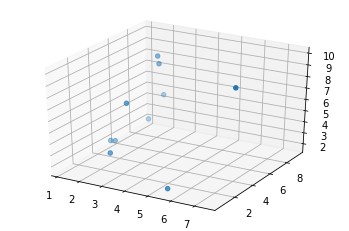

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = data['star_wars'], ys = data['lord_of_the_rings'], zs=data['harry_potter'])

In [11]:
###### realicemos el calculo de agrupacion jerarquica con linkeo simple a mano, como sigue:

df=dm_to_df(dd1, data['user_id'])
z=[]

In [12]:
df[11]=df[1]+df[10]
df.loc[11]=df.loc[1]+df.loc[10]
z.append([1,10,0.7,2])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [13]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [14]:
df = df.drop([1,10])
df = df.drop([1,10], axis = 1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [15]:
x=2
y=7

n=12
df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
z.append([x,y,df.loc[x][y],2])
df

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])
df

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)
df

### repetir

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


### Cluster Jerarquico en Python

In [16]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [17]:
z = linkage(data[movies], 'ward')
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

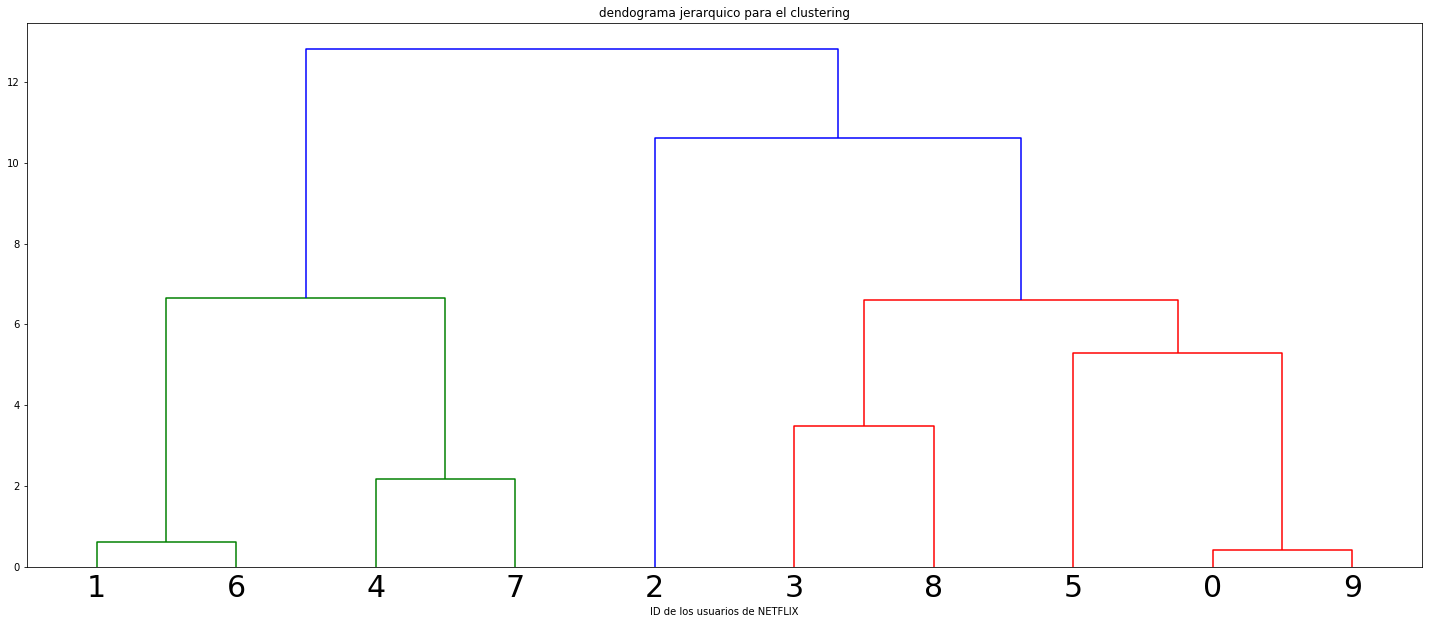

In [18]:
plt.figure(figsize = (25,10))
plt.title('dendograma jerarquico para el clustering')
plt.xlabel('ID de los usuarios de NETFLIX')
dendrogram(z,leaf_rotation=0.,leaf_font_size=30)
plt.show()

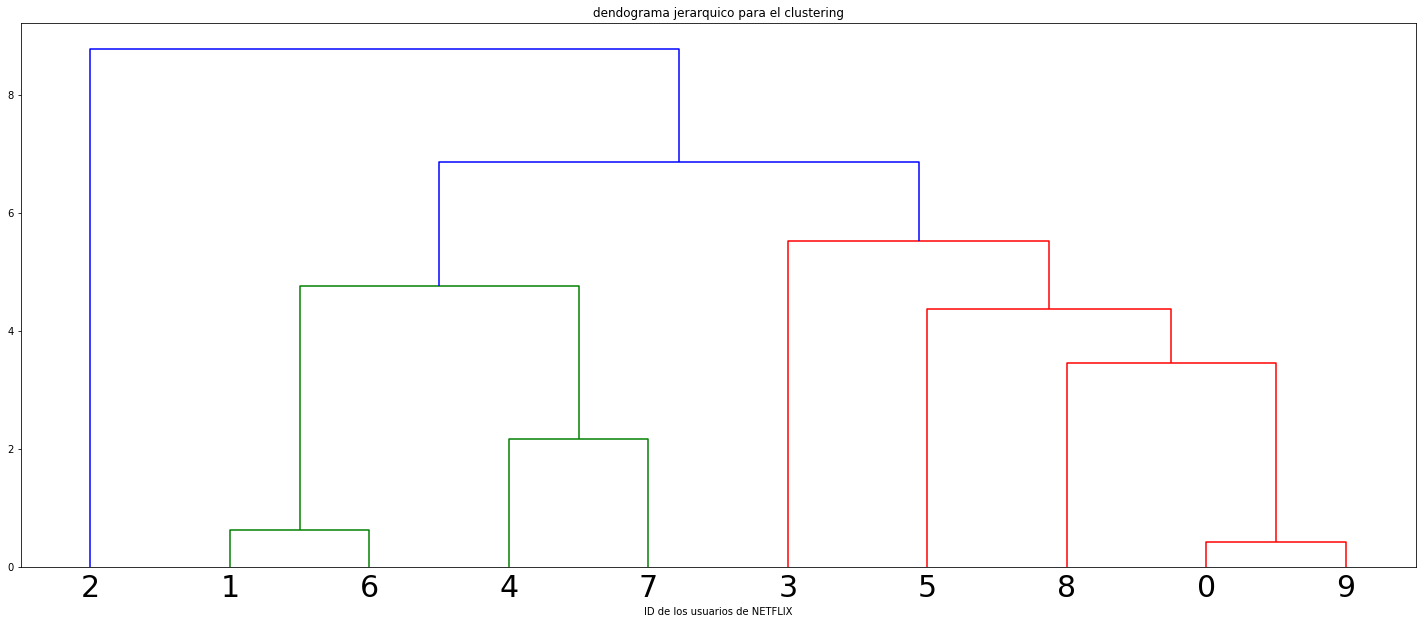

In [19]:
z = linkage(data[movies], method = 'average')
z
plt.figure(figsize = (25,10))
plt.title('dendograma jerarquico para el clustering')
plt.xlabel('ID de los usuarios de NETFLIX')
dendrogram(z,leaf_rotation=0.,leaf_font_size=30)
plt.show()

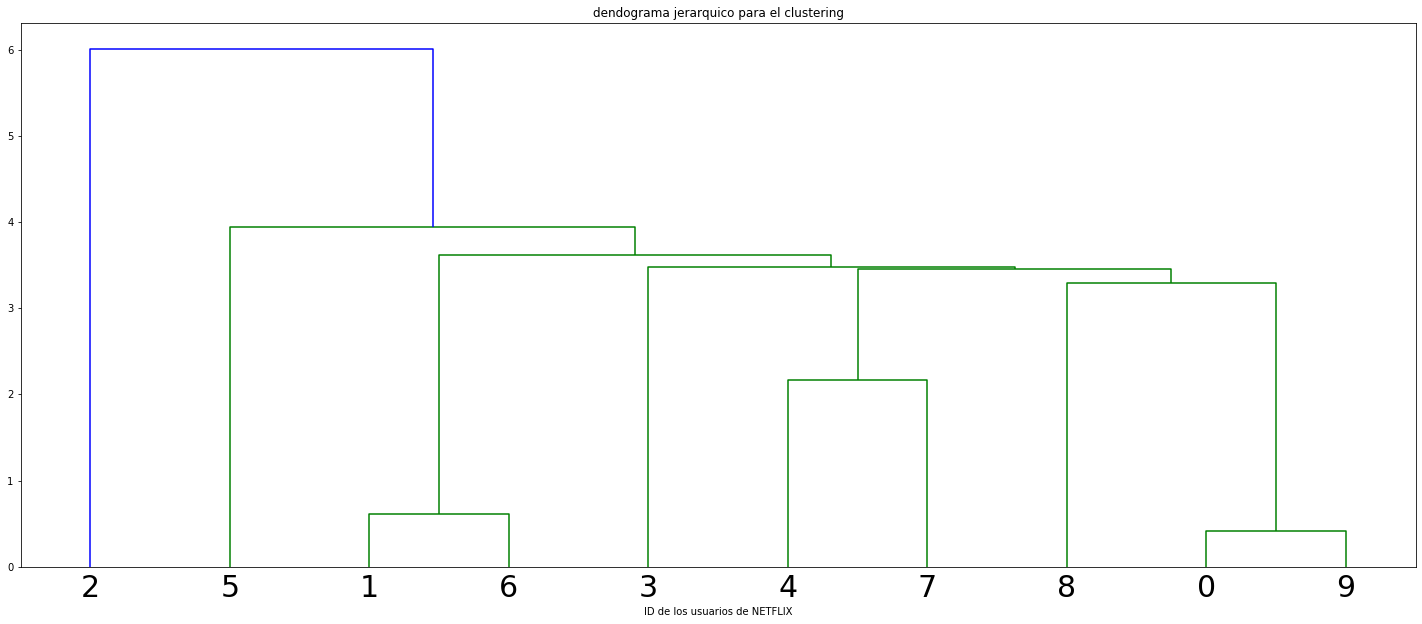

In [20]:
z = linkage(data[movies], method = 'single')
z
plt.figure(figsize = (25,10))
plt.title('dendograma jerarquico para el clustering')
plt.xlabel('ID de los usuarios de NETFLIX')
dendrogram(z,leaf_rotation=0.,leaf_font_size=30)
plt.show()


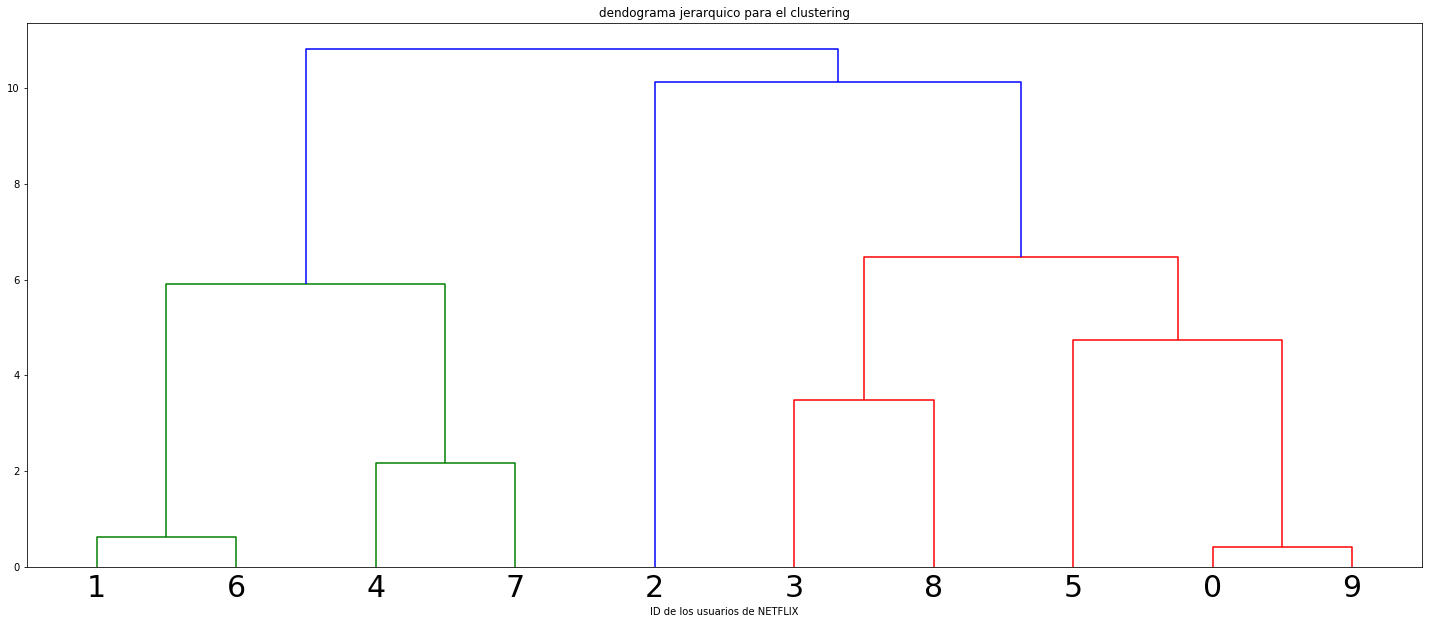

In [21]:
z = linkage(data[movies], method = 'complete')
z
plt.figure(figsize = (25,10))
plt.title('dendograma jerarquico para el clustering')
plt.xlabel('ID de los usuarios de NETFLIX')
dendrogram(z,leaf_rotation=0.,leaf_font_size=30)
plt.show()


In [22]:
"""
‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, 
‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, 
‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.
"""

'\n‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, \n‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, \n‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.\n'

# Clustering jerarquico y dendogramas
* X dataset (array nxm) 
* n numero de datos
* m numero de rasgos
* z array de enlace del cluster con la informacion de las uniones
* k numero de clsters

In [23]:
from scipy.cluster.hierarchy import dendrogram,linkage  ## clusters y dendogramas

In [24]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])

(150, 2)


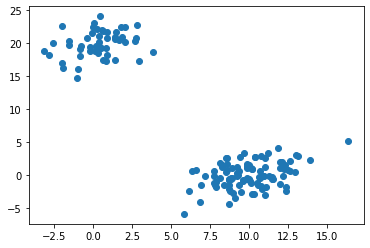

In [25]:
x=np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [26]:
z = linkage(x, 'ward')
z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [27]:
c, cohp_dist = cophenet(z, pdist(x))
c

0.9800148387574268

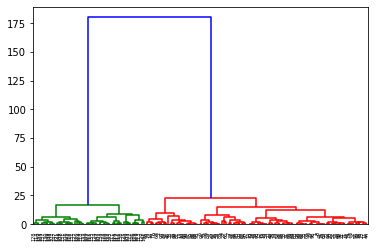

In [28]:
plt.figure()
dendrogram(z)
plt.show()

In [29]:
z[0]  ### primer paso del algoritmo

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [30]:
z[1]  ### segundo paso del algoritmo

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [31]:
print(z[152-len(x)]) # cluster 152
print(z[158-len(x)]) # cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [32]:
x[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

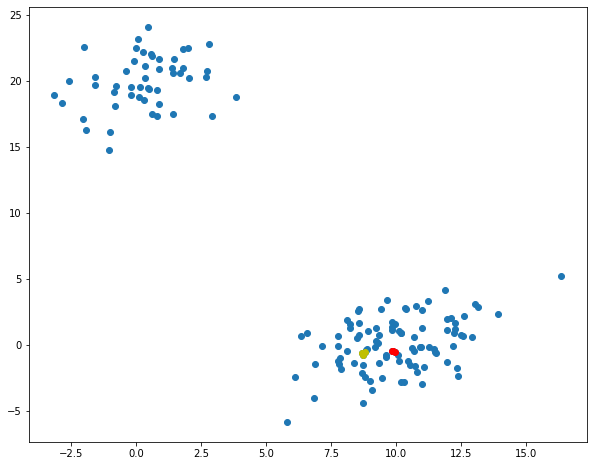

In [33]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1]) # pintar todos los puntos
plt.scatter(x[idx,0], x[idx,1], c='r') # destacamos en rojo los puntos interesantes
plt.scatter(x[idx2,0], x[idx2,1], c ='y') # destacamos en amarillo el segundo cluster
plt.show()

### representacion grafica del dendograma

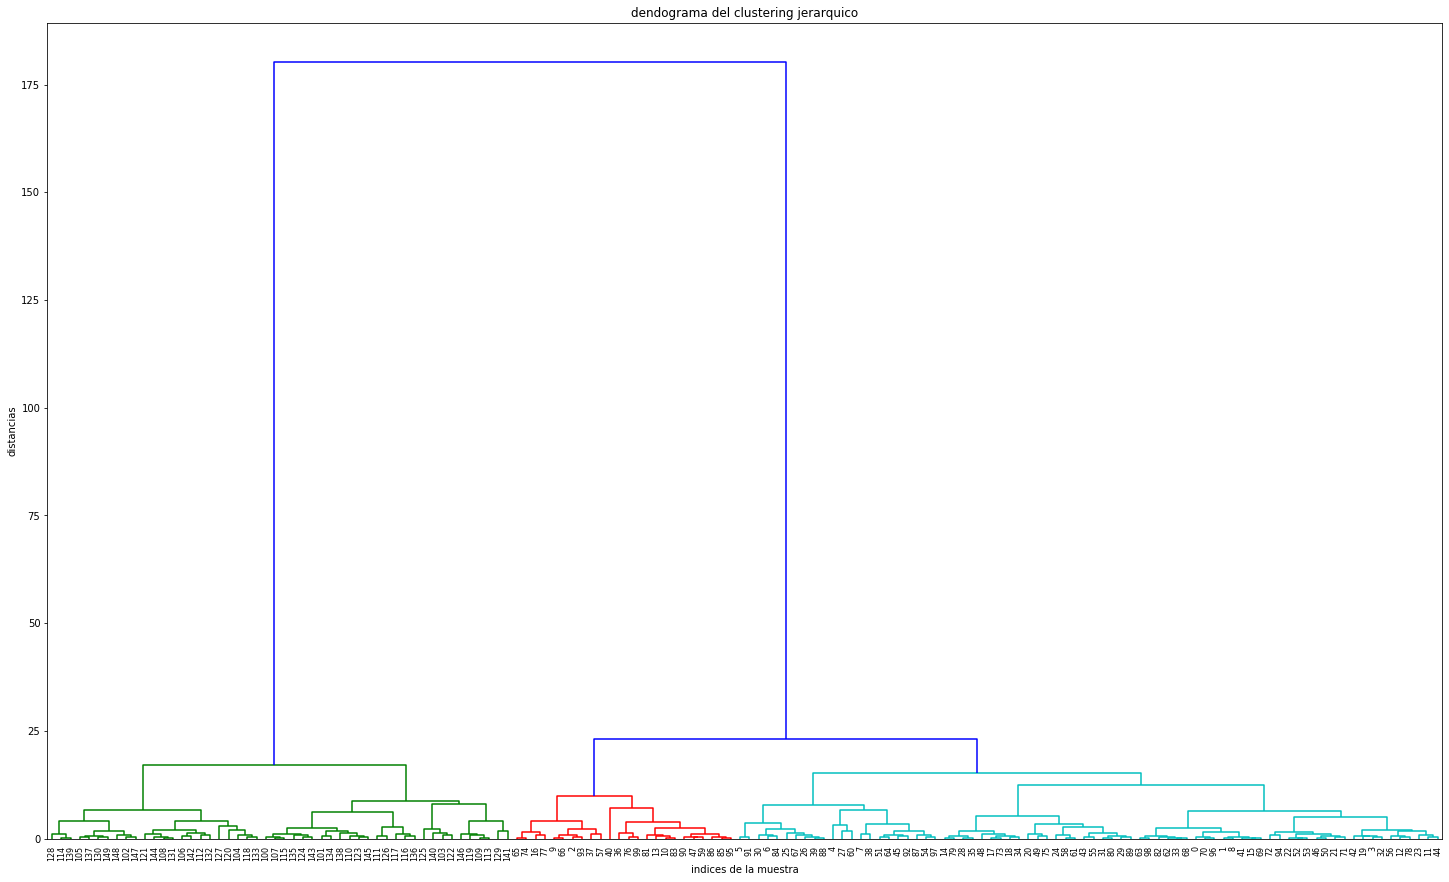

In [34]:
plt.figure(figsize = (25,15))
plt.title('dendograma del clustering jerarquico')
plt.xlabel('indices de la muestra')
plt.ylabel('distancias')
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.1*180)
plt.show()

### Truncar el dendograma

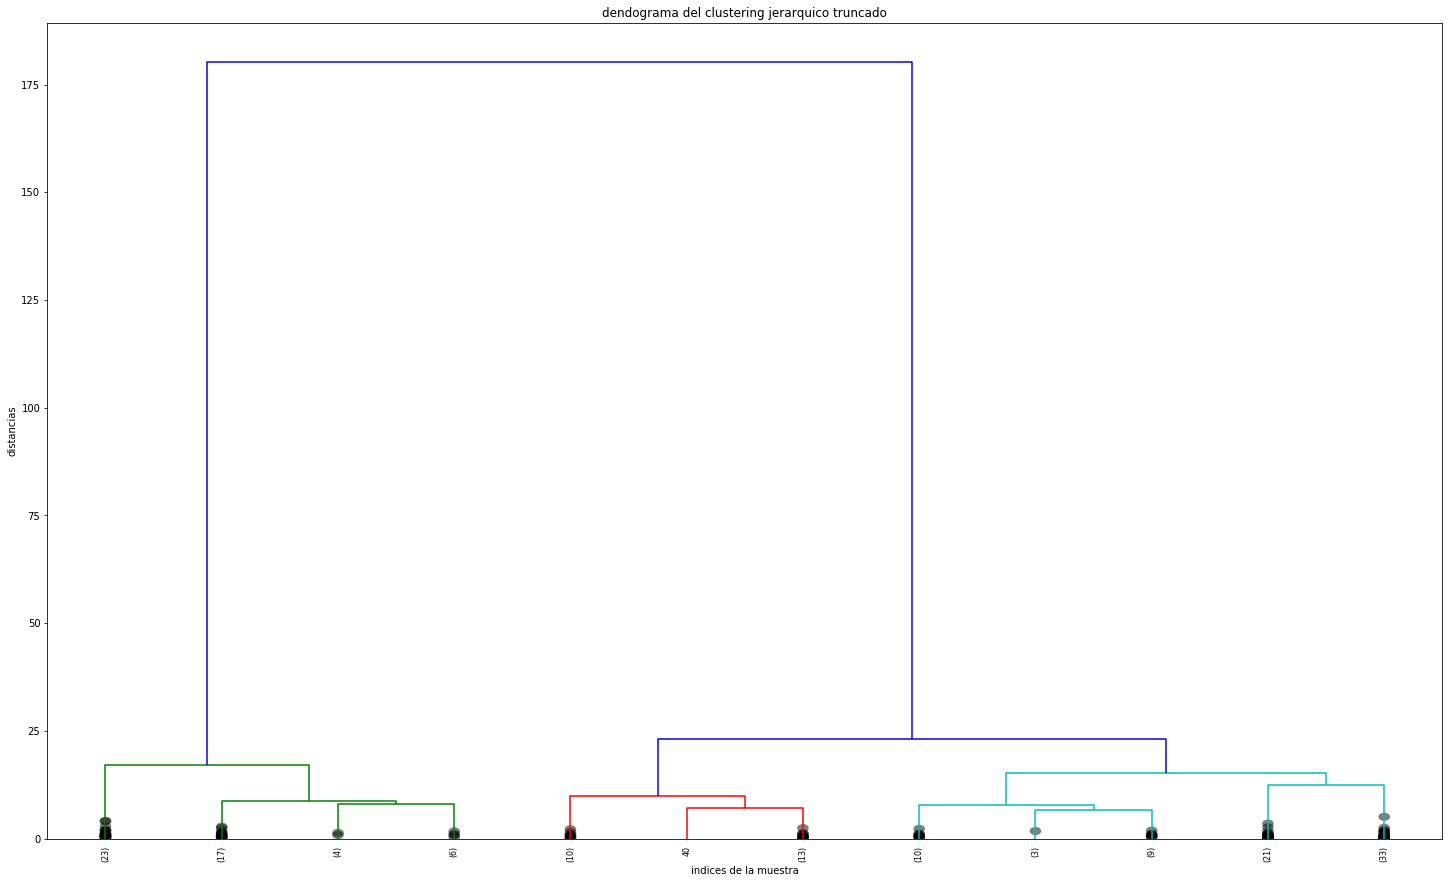

In [35]:
plt.figure(figsize = (25,15))
plt.title('dendograma del clustering jerarquico truncado')
plt.xlabel('indices de la muestra')
plt.ylabel('distancias')
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.1*180, truncate_mode='lastp',
          p = 12, show_leaf_counts=True, show_contracted=True)
plt.show()

###  dendograma personalizado

In [36]:
def dendogram_tune(*arg, **kwarg):
    max_d = kwarg.pop('max_d', None)
    if max_d and 'color_threshold' not in kwarg:
        kwarg['color_threshold'] = max_d
    annotate_above = kwarg.pop('anotate_above', 0)
    
    ddata = dendrogram(*arg,**kwarg)
    
    if not kwarg.get('no_plot', False):
        plt.title('Clustering jerarquico con dendograma truncado')
        plt.xlabel('indice del dataset (o tamano del cluster)')
        for i,d,c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5*sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y),xytext = (0,-5),textcoords='offset points',
                            va = 'top', ha ='center')
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata

In [37]:
dendogram_tune(z,truncate_mode = 'lastp',p=12, leaf_rotation=90,
              leaf_font_size=12, show_contracted=True, annotate_above = 10)

TypeError: dendrogram() got an unexpected keyword argument 'annotate_above'

### corte automatico del dendograma

In [40]:
from scipy.cluster.hierarchy import inconsistent

In [41]:
d = 3
incons = inconsistent(z, d)
incons[-10:]

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### Metodo del codo

In [42]:
last = z[-10:,2]
last

array([  7.11106083,   7.86878542,   8.04935282,   8.74822275,
         9.84427829,  12.42734657,  15.11533118,  17.11527362,
        23.12198936, 180.27043021])

In [43]:
last_rev = last[::-1]
last_rev

array([180.27043021,  23.12198936,  17.11527362,  15.11533118,
        12.42734657,   9.84427829,   8.74822275,   8.04935282,
         7.86878542,   7.11106083])

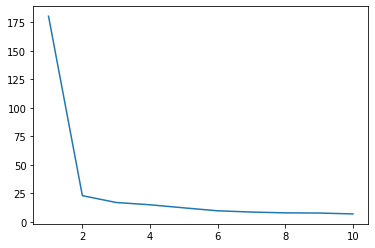

In [44]:
idx = np.arange(1,len(last)+1)
plt.plot(idx,last_rev)

In [45]:
acc = np.diff(last,2)
acc

array([-5.77157189e-01,  5.18302524e-01,  3.97185622e-01,  1.48701273e+00,
        1.04916333e-01, -6.88042176e-01,  4.00677330e+00,  1.51141725e+02])

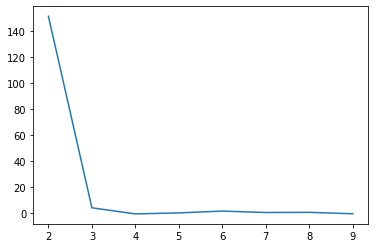

In [46]:
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)

In [47]:
k = acc_rev.argmax() +2
k

2

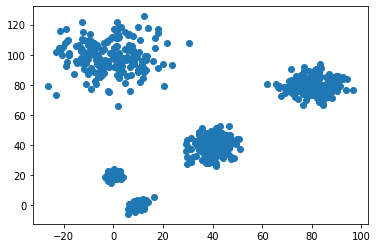

In [48]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size = [200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size = [200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size = [200,])
x2 = np.concatenate((x,c,d,e),)
plt.scatter(x2[:,0],x2[:,1])
plt.show()

In [49]:
z2 = linkage(x2,'ward')

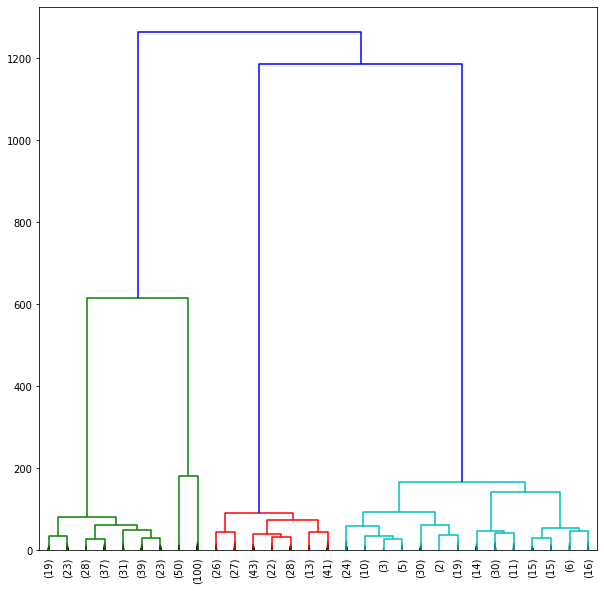

In [50]:
plt.figure(figsize=(10,10))
dendrogram(z2,truncate_mode='lastp',p=30, leaf_rotation=90, leaf_font_size=10, show_contracted=True)
plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


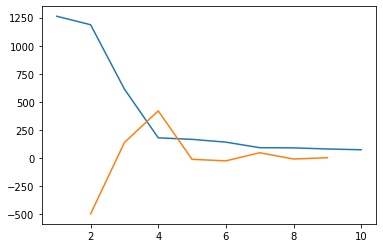

4


In [51]:
last = z2[-10: ,2]
last_rev = last[::-1]
print(last_rev)
idx= np.arange(1, len(last)+1)
plt.plot(idx,last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax()+2
print(k)

In [52]:
inconsistent(z2,5)[-10:]

array([[ 13.99221995,  15.56655759,  30.        ,   3.8658472 ],
       [ 16.73940735,  18.56390061,  30.        ,   3.45982932],
       [ 19.05945013,  20.53210626,  31.        ,   3.49952861],
       [ 19.25573887,  20.8265769 ,  29.        ,   3.51907342],
       [ 21.36116189,  26.77659523,  30.        ,   4.50255938],
       [ 36.58100874,  37.08602393,  31.        ,   3.50761079],
       [ 12.12200256,  32.15467931,  30.        ,   5.22936105],
       [ 42.61369802, 111.38576865,  31.        ,   5.13038026],
       [ 81.75198678, 208.31582073,  31.        ,   5.30447871],
       [147.25602023, 307.95700562,  31.        ,   3.62149673]])

# Recuperar los clusters de los usuarios

In [58]:
max_d = 20
clusters = fcluster(z,max_d, criterion='distance')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [56]:
k = 3
clusters = fcluster(z, k, criterion='maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [59]:
fcluster(z,8,depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

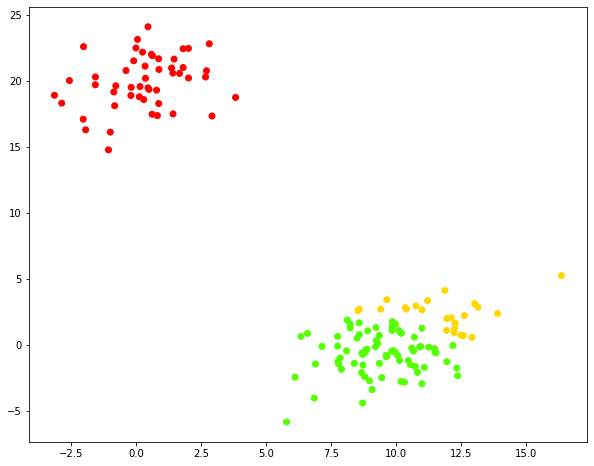

In [62]:
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1], c = clusters, cmap='prism')